In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm

In [4]:
products = pd.read_excel("Face_mask_data.xlsx", sheet_name="Products")
products.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks


In [197]:
reviews = pd.read_excel("Face_mask_data.xlsx", sheet_name="Reviews")
reviews.head()

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,Review Text ? Translation,Review Title ? Translation,translation.reviewTitle
0,0,iHerb Customer,0,6.0,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839.0,0.0,...,50.0,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1614071050.569,en-US,NaN,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,NaN
1,0,iHerb Customer,0,0.0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839.0,0.0,...,50.0,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1612659399.055,ru-RU,The grandson really liked it. Comfortable mask.,The grandson really liked it. Comfortable mask.,Perfectly!,en-US
2,0,iHerb Customer,0,0.0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839.0,0.0,...,40.0,Easy to put on & comfortable to wear.,Good,False,1612647602.886,en-US,NaN,Easy to put on & comfortable to wear.,Good,NaN
3,0,InnaIgorevna,0,0.0,2890ac54-8707-418e-be3e-8d46231e3672,0,ru-RU,2021-02-05T16:29:28.906Z,103839.0,0.0,...,40.0,"Тонкая, приятная к телу маска. Расцветка тоже ...",Хорошо,False,1612542568.906,ru-RU,A thin mask that is pleasant to the body. I li...,A thin mask that is pleasant to the body. I li...,Okay,en-US
4,0,iHerb Customer,0,0.0,9db33354-0457-4efa-bc9c-b5f7ee0eff31,0,ru-RU,2021-02-05T09:43:42.367Z,103839.0,0.0,...,50.0,Отличная маска! Мне подошла идеально. Слегка е...,Прекрасно!,False,1612518222.367,ru-RU,Great mask! It suited me perfectly. There is a...,Great mask! It suited me perfectly. There is a...,Perfectly!,en-US


In [110]:
reviews.shape

(3817, 21)

## Alter columns in Reviews DataFrame

In [198]:
reviews['productId']=reviews['productId'].convert_dtypes()
reviews.head(3)

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,Review Text ? Translation,Review Title ? Translation,translation.reviewTitle
0,0,iHerb Customer,0,6.0,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,...,50.0,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1614071050.569,en-US,NaN,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,NaN
1,0,iHerb Customer,0,0.0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,...,50.0,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1612659399.055,ru-RU,The grandson really liked it. Comfortable mask.,The grandson really liked it. Comfortable mask.,Perfectly!,en-US
2,0,iHerb Customer,0,0.0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,...,40.0,Easy to put on & comfortable to wear.,Good,False,1612647602.886,en-US,NaN,Easy to put on & comfortable to wear.,Good,NaN


In [199]:
reviews['ratingValue'] = (reviews['ratingValue'] / 10).convert_dtypes()
reviews.head(3)

,abuseCount,customerNickname,helpfulNo,helpfulYes,id,imagesCount,languageCode,postedDate,productId,profileInfo.ugcSummary.answerCount,...,ratingValue,reviewText,reviewTitle,reviewed,score,languageCode.1,translation.reviewText,Review Text ? Translation,Review Title ? Translation,translation.reviewTitle
0,0,iHerb Customer,0,6.0,05c2b17e-c28d-4792-930d-27e787d8d4ad,1,en-US,2021-01-27T09:04:10.569Z,103839,0.0,...,5,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,True,1614071050.569,en-US,NaN,The mask quality and the color is good. It fit...,Dotted Pattern Is Nice,NaN
1,0,iHerb Customer,0,0.0,80e44af8-2edf-4b81-a80a-7e7888d03cc0,0,ru-RU,2021-02-07T00:56:39.055Z,103839,0.0,...,5,Внуку очень понравилось. Удобная маска.,Прекрасно!,False,1612659399.055,ru-RU,The grandson really liked it. Comfortable mask.,The grandson really liked it. Comfortable mask.,Perfectly!,en-US
2,0,iHerb Customer,0,0.0,9a76e047-21e4-4da3-8b50-9d2396519b6b,0,en-US,2021-02-06T21:40:02.886Z,103839,0.0,...,4,Easy to put on & comfortable to wear.,Good,False,1612647602.886,en-US,NaN,Easy to put on & comfortable to wear.,Good,NaN


### Group by country

In [8]:
reviews_bycountry = reviews.groupby("languageCode").sum()

In [9]:
reviews_bycountry['languageCode']=reviews_bycountry.index
# reviews_bycountry.index = range(12)
reviews_bycountry

,helpfulYes,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,languageCode
languageCode,,,,,,
ar-SA,7.000000e+01,22693442,1044.0,37638.0,951,ar-SA
de-DE,2.000000e+00,1109249,12.0,645.0,46,de-DE
en-US,1.286539e+10,185207589,2918.0,81128.0,8052,en-US
es-MX,3.800000e+01,1316920,6.0,341.0,62,es-MX
fr-FR,2.800000e+01,10288126,176.0,4226.0,429,fr-FR
he-IL,1.600000e+01,15970855,35.0,10165.0,714,he-IL
ja-JP,8.200000e+01,11952316,83.0,6963.0,467,ja-JP
ko-KR,1.400000e+01,1931580,1.0,1014.0,70,ko-KR
pt-BR,0.000000e+00,299487,0.0,35.0,15,pt-BR


In [11]:
reviews_bycountry['avgRating'] = reviews_bycountry["ratingValue"]/reviews_bycountry["profileInfo.ugcSummary.reviewCount"]
reviews_bycountry.head(3)

,helpfulYes,productId,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,languageCode,avgRating
languageCode,,,,,,,
ar-SA,7.000000e+01,22693442,1044.0,37638.0,951,ar-SA,0.025267
de-DE,2.000000e+00,1109249,12.0,645.0,46,de-DE,0.071318
en-US,1.286539e+10,185207589,2918.0,81128.0,8052,en-US,0.099251


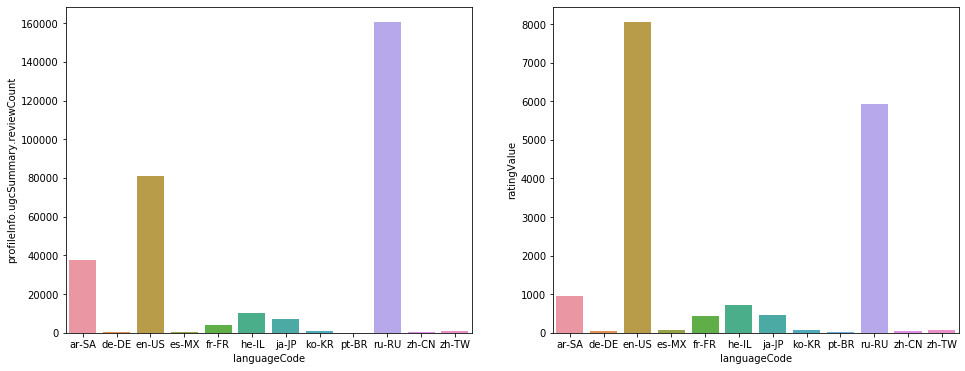

In [12]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.barplot(data=reviews_bycountry, x="languageCode",y="profileInfo.ugcSummary.reviewCount", order=)
plt.subplot(122)
sns.barplot(data=reviews_bycountry, x = "languageCode", y = "ratingValue")
plt.show()

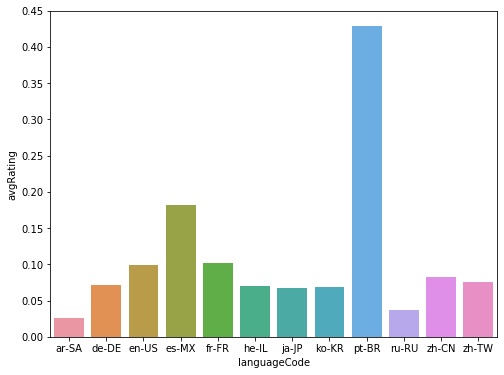

In [13]:
plt.figure(figsize=(8,6))
sns.barplot(data=reviews_bycountry, x="languageCode",y="avgRating")
plt.show()

### Group by ProductID

In [89]:
popularity = reviews['productId'].value_counts()

In [95]:
products['popularity'] = [popularity[iidd] for iidd in products['product_id']]

In [96]:
products

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url,popularity
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,126
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,168
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks,657
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks,42
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks,316
5,100837,"La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...",5.61,AUD,http://schema.org/InStock,https://au.iherb.com/pr/La-Hauteur-Disposable-...,https://au.iherb.com/c/protective-face-masks,225
6,100840,"YJ Corporation, Disposable KF94 ( N95 / KN95/ ...",3.93,AUD,http://schema.org/InStock,https://au.iherb.com/pr/YJ-Corporation-Disposa...,https://au.iherb.com/c/protective-face-masks,68
7,103204,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",50.19,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,41
8,103840,"Lozperi, Copper Mask, Adult, Gray, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks,20
9,103743,"Puritas, 10 Days Mask, Large, 3 Pack",6.61,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Puritas-10-Days-Mask-L...,https://au.iherb.com/c/protective-face-masks,46


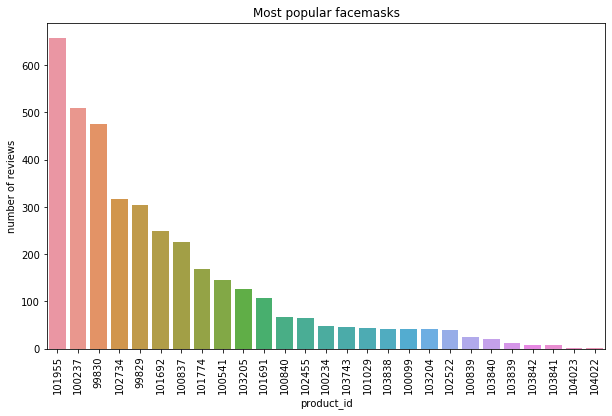

In [103]:
plt.figure(figsize=(10,6))
plt.title('Most popular facemasks')
sns.barplot(data=products,x= 'product_id', y='popularity',order=products.sort_values('popularity', ascending = False).product_id)
plt.xticks(rotation=90)
plt.ylabel('number of reviews')
plt.show()

In [116]:
reviews_bypid = reviews.groupby("productId").sum()
reviews_bypid.head()

,helpfulYes,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue
productId,,,,
99829,158.0,587.0,26111.0,1379
99830,478.0,1749.0,39185.0,2153
100099,71.0,13.0,963.0,143
100234,22.0,119.0,3188.0,193
100237,116.0,1104.0,33754.0,2152


In [117]:
ratings = reviews_bypid['ratingValue']

In [118]:
ratings

productId
99829     1379
99830     2153
100099     143
100234     193
100237    2152
100541     642
100837    1024
100839     103
100840     310
101029     174
101691     477
101692    1122
101774     770
101955    2909
102455     266
102522     177
102734    1469
103204     195
103205     574
103743     211
103838     193
103839      58
103840      94
103841      28
103842      38
104022       9
104023       8
Name: ratingValue, dtype: Int64

In [120]:
products['total_ratings']=[ratings[idd] for idd in products['product_id']]

In [122]:
products['avg_rating'] = products['total_ratings']/products['popularity']

In [123]:
products.head()

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url,popularity,total_ratings,avg_rating
0,103205,"Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Hwipure-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,126,574,4.555556
1,101774,"HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...",2.95,AUD,http://schema.org/InStock,https://au.iherb.com/pr/HIGUARD-Disposable-KF9...,https://au.iherb.com/c/protective-face-masks,168,770,4.583333
2,101955,"SunJoy, KN95, Professional Protective Disposab...",8.86,AUD,http://schema.org/InStock,https://au.iherb.com/pr/SunJoy-KN95-Profession...,https://au.iherb.com/c/protective-face-masks,657,2909,4.427702
3,103838,"Lozperi, Copper Mask, Adult, Black, 1 Mask",6.85,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...,https://au.iherb.com/c/protective-face-masks,42,193,4.595238
4,102734,"Zidian, Disposable Protective Mask, 50 Pack",15.35,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Zidian-Disposable-Prot...,https://au.iherb.com/c/protective-face-masks,316,1469,4.648734


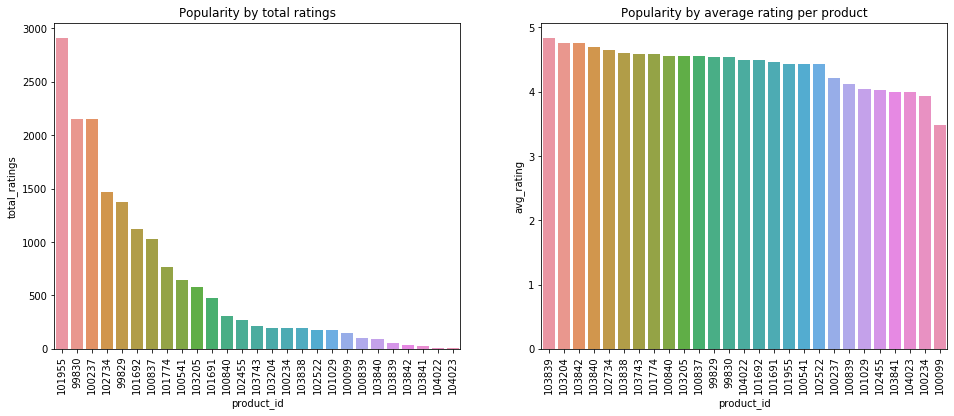

In [128]:
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.title('Popularity by total ratings')
sns.barplot(data=products,x= 'product_id', y='total_ratings',order=products.sort_values('total_ratings', ascending = False).product_id)
plt.xticks(rotation=90)
plt.subplot(122)
plt.title('Popularity by average rating per product')
sns.barplot(data=products, x = "product_id", y = "avg_rating", order=products.sort_values('avg_rating', ascending = False).product_id)
plt.xticks(rotation=90)
plt.show()

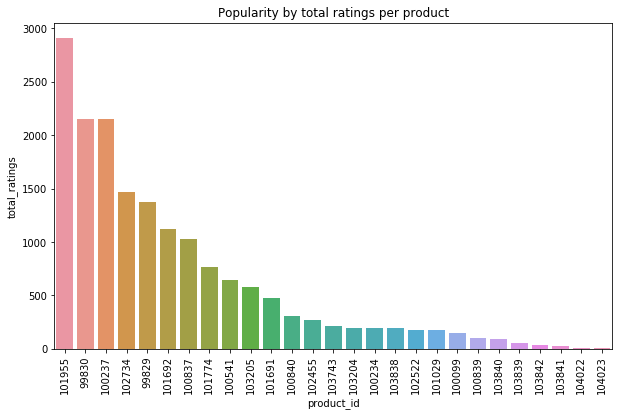

In [243]:
plt.figure(figsize=(10,6))
plt.title('Popularity by total ratings per product')
sns.barplot(data=products, x = "product_id", y = "total_ratings", order=products.sort_values('total_ratings', ascending = False).product_id)
plt.xticks(rotation=90)
plt.show()

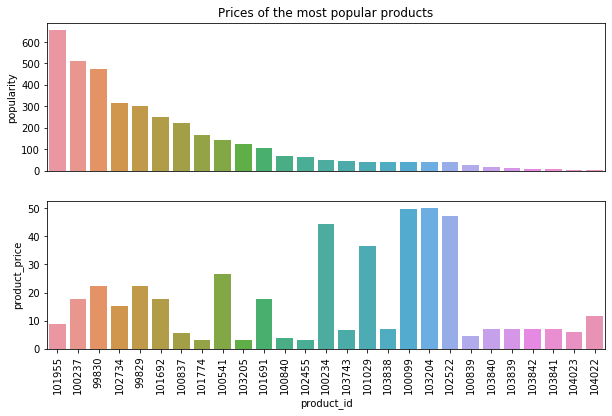

In [155]:
plt.figure(figsize=(10,6))
plt.subplot(211)
plt.title('Prices of the most popular products')
sns.barplot(data=products,x= 'product_id', y='popularity',order=products.sort_values('popularity', ascending = False).product_id)
plt.xticks([])
plt.xlabel('')
plt.subplot(212)
sns.barplot(data=products,x= 'product_id', y='product_price',order=products.sort_values('popularity', ascending = False).product_id)
plt.xticks(rotation=90)
plt.show()

In [152]:
plt.xlabel?

In [166]:
products[products['product_name'].str.contains('usable')]

,product_id,product_name,product_price,price_currency,product_availability,product_url,source_url,popularity,total_ratings,avg_rating
13,101692,"Kitsch, 100% Cotton Reusable Face Masks, Neutr...",17.72,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kitsch-100-Cotton-Reus...,https://au.iherb.com/c/protective-face-masks,250,1122,4.488000
17,99830,"Kosette, Nano Reusable Face Protection Mask, M...",22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks,475,2153,4.532632
19,99829,"Kosette, Nano Reusable Face Protection Mask, L...",22.44,AUD,http://schema.org/InStock,https://au.iherb.com/pr/Kosette-Nano-Reusable-...,https://au.iherb.com/c/protective-face-masks,304,1379,4.536184


In [185]:
products['Disposable']=products['product_name'].str.contains('Disposable')

In [177]:
products['Reusable']=products['product_name'].str.contains('usable')

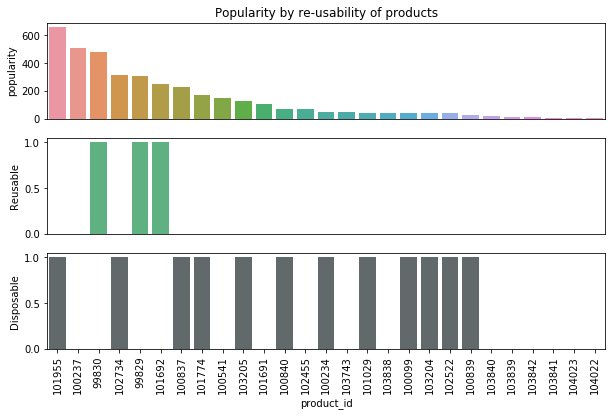

In [187]:
plt.figure(figsize=(10,6))
plt.subplot(311)
plt.title('Popularity by re-usability of products')
sns.barplot(data=products,x= 'product_id', y='popularity',order=products.sort_values('popularity', ascending = False).product_id)
plt.xticks([])
plt.xlabel('')
plt.subplot(312)
sns.barplot(data=products,x= 'product_id', y='Reusable',order=products.sort_values('popularity', ascending = False).product_id,color='#52BE80')
plt.xticks([])
plt.xlabel('')
plt.subplot(313)
sns.barplot(data=products,x= 'product_id', y='Disposable',order=products.sort_values('popularity', ascending = False).product_id,color='#616A6B')
plt.xticks(rotation=90)
plt.show()

In [188]:
products['product_name'].str.contains('cotton')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
Name: product_name, dtype: bool

In [142]:
popularity.head()

101955    657
100237    510
99830     475
102734    316
99829     304
Name: productId, dtype: Int64

In [41]:
reviews_bypid['productId'] = reviews_bypid.index
reviews_bypid['productId'] = reviews_bypid['productId'].astype('str').astype('category')

In [48]:
reviews_bypid = reviews_bypid.sort_values(by='profileInfo.ugcSummary.reviewCount', ascending=False)

In [49]:
reviews_bypid[['productId','profileInfo.ugcSummary.reviewCount']]

,productId,profileInfo.ugcSummary.reviewCount
productId,,
101955,101955,43563.0
99830,99830,39185.0
100237,100237,33754.0
99829,99829,26111.0
100837,100837,24208.0
102734,102734,24024.0
101774,101774,22432.0
101692,101692,13777.0
102455,102455,12588.0


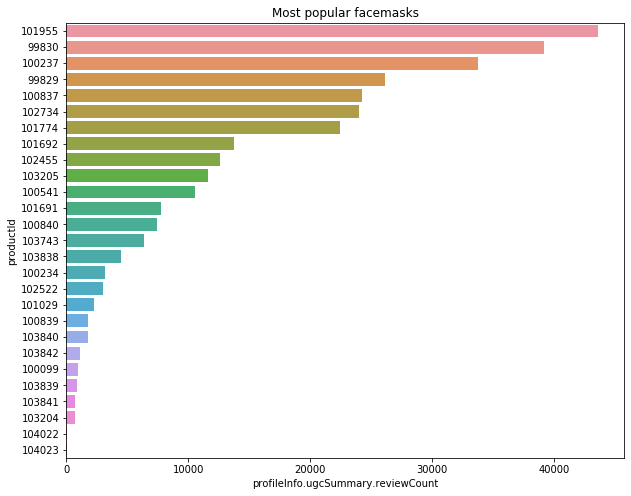

In [54]:
plt.figure(figsize=(10,8))
plt.title('Most popular facemasks')
sns.barplot(data=reviews_bypid, x="profileInfo.ugcSummary.reviewCount", y="productId", order=reviews_bypid.sort_values('profileInfo.ugcSummary.reviewCount', ascending = False).productId)
plt.show()

In [55]:
reviews_bypid['avgRating'] = reviews_bypid["ratingValue"]/reviews_bypid["profileInfo.ugcSummary.reviewCount"]
reviews_bypid.head(3)

,helpfulYes,profileInfo.ugcSummary.answerCount,profileInfo.ugcSummary.reviewCount,ratingValue,productId,avgRating
productId,,,,,,
101955,435.0,2212.0,43563.0,2909,101955,0.066777
99830,478.0,1749.0,39185.0,2153,99830,0.054944
100237,116.0,1104.0,33754.0,2152,100237,0.063755


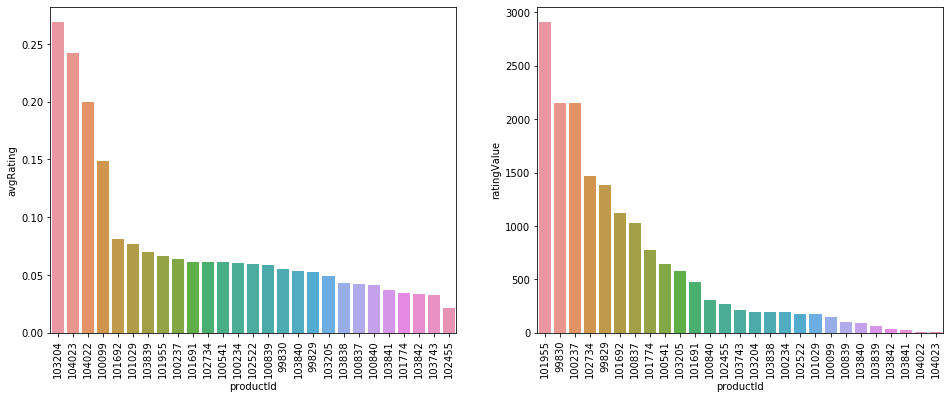

In [62]:
plt.figure(figsize=(16,6))
plt.subplot(121)
sns.barplot(data=reviews_bypid, x="productId",y="avgRating", order=reviews_bypid.sort_values('avgRating', ascending = False).productId)
plt.xticks(rotation=90)
plt.subplot(122)
sns.barplot(data=reviews_bypid, x = "productId", y = "ratingValue", order=reviews_bypid.sort_values('ratingValue', ascending = False).productId)
plt.xticks(rotation=90)
plt.show()

In [190]:
reviews.groupby('')

Index(['abuseCount', 'customerNickname', 'helpfulNo', 'helpfulYes', 'id',
       'imagesCount', 'languageCode', 'postedDate', 'productId',
       'profileInfo.ugcSummary.answerCount',
       'profileInfo.ugcSummary.reviewCount', 'ratingValue', 'reviewText',
       'reviewTitle', 'reviewed', 'score', 'languageCode.1',
       'translation.reviewText', 'Review Text ? Translation',
       'Review Title ? Translation', 'translation.reviewTitle'],
      dtype='object')

In [206]:
reviewtext = reviews.sort_values(by='ratingValue',ascending=False)

In [210]:
reviewtext=reviewtext.dropna()

In [233]:
review_dict={}

In [234]:
review_dict['soft']=reviewtext[reviewtext['Review Text ? Translation'].str.contains('soft')].groupby('productId').sum()['ratingValue'].sum()

In [235]:
review_dict['cotton']=reviewtext[reviewtext['Review Text ? Translation'].str.contains('cotton')].groupby('productId').sum()['ratingValue'].sum()

In [236]:
review_dict['comfortable']=reviewtext[reviewtext['Review Text ? Translation'].str.contains('comfortable')].groupby('productId').sum()['ratingValue'].sum()

In [237]:
review_dict['quality']=reviewtext[reviewtext['Review Text ? Translation'].str.contains('quality')].groupby('productId').sum()['ratingValue'].sum()

In [238]:
review_dict['fit']=reviewtext[reviewtext['Review Text ? Translation'].str.contains('fit')].groupby('productId').sum()['ratingValue'].sum()

In [239]:
review_dict['breathe']=reviewtext[reviewtext['Review Text ? Translation'].str.contains('breathe')].groupby('productId').sum()['ratingValue'].sum()

In [240]:
review_dict

{'soft': 274,
 'cotton': 255,
 'comfortable': 1705,
 'quality': 1088,
 'fit': 1123,
 'breathe': 1703}